/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


4/4 [==============================] - 0s 4ms/step - loss: 12.4319
Test Loss: 12.431901931762695


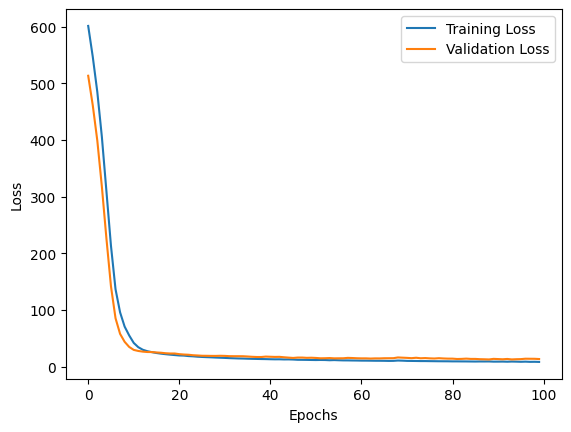

In [3]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Load the Boston Housing Prices dataset
boston = fetch_openml(name='boston', version=1)

X, y = boston.data, boston.target

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Compute R^2 score
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')


Mean Absolute Error: 2.4177035182130107
Mean Squared Error: 12.43190059963994
R^2 Score: 0.8304751225985272


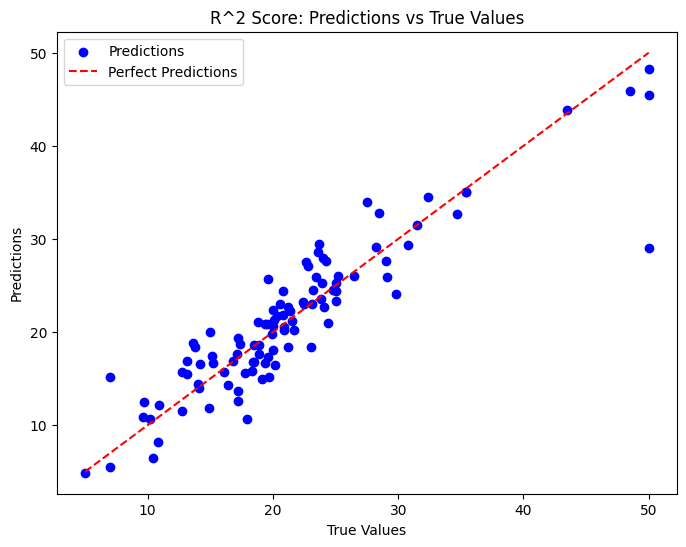

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Predictions')
plt.title('R^2 Score: Predictions vs True Values')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.show()


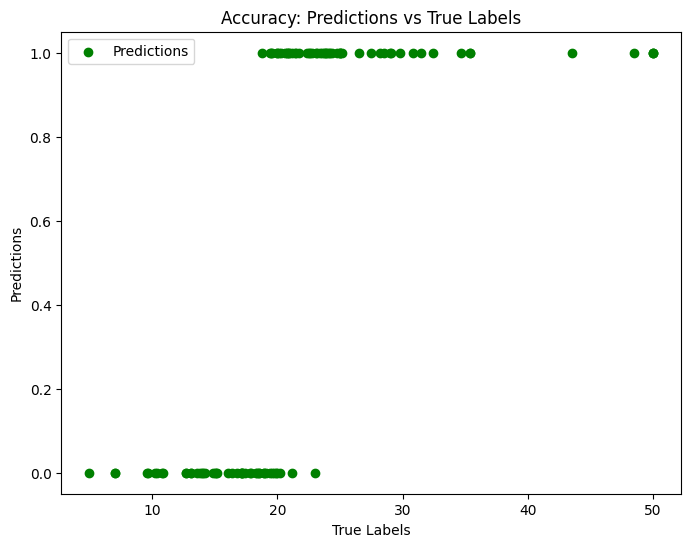

In [11]:
  # Convert predictions to binary
threshold = 20  # Example threshold
y_pred_binary = np.where(y_pred >= threshold, 1, 0)

# Visualize binary predictions and true labels
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_binary, color='green', label='Predictions')
plt.title('Accuracy: Predictions vs True Labels')
plt.xlabel('True Labels')
plt.ylabel('Predictions')
plt.legend()
plt.show()


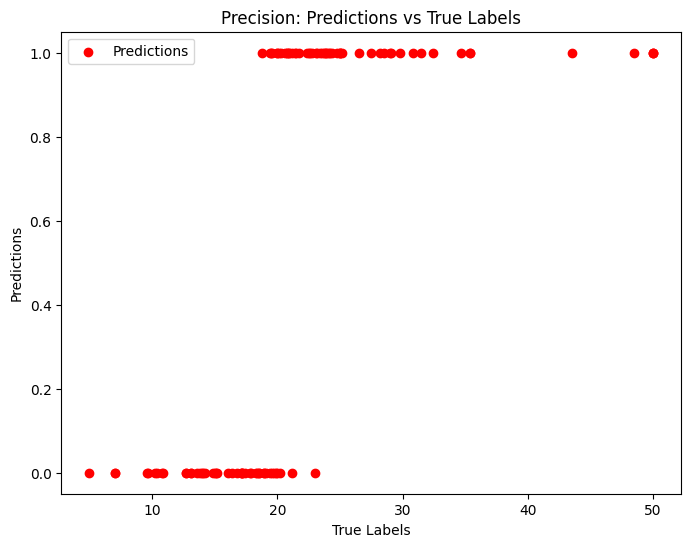

In [13]:
# Convert predictions to binary
threshold = 20  # Example threshold
y_pred_binary = np.where(y_pred >= threshold, 1, 0)

# Visualize binary predictions and true labels
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_binary, color='red', label='Predictions')
plt.title('Precision: Predictions vs True Labels')
plt.xlabel('True Labels')
plt.ylabel('Predictions')
plt.legend()
plt.show()
